# Snakes and Ladders Game Analysis Using Monte Carlo Simulations

In [1]:
#Importing Packages
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/Users/nathanaelnam/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### We will create a single simulation of the game

In [2]:
#Creates a fair dice roller

def roll_dice():
    """
    Simulates a fair dice roll with
    Returns: Integer from 1 to 6
    """
    return random.randint(1,6)
    

In [3]:
#Creates a single game simulation
#9 ladders, 10 snakes
#Ladders on 1,4,9,21,28,36,51,71,80 (non-indexing)
#Snakes on 16, 47, 49, 56, 62, 64, 87, 93, 95, 98 (non-indexing)

def play_game_board():
    
    """
    Simulates a game of snakes and ladders
    Returns: player_position, turns, chutes_hit, ladders_hit, tracking_board_before, tracking_board_after
    """
    
    game_board = [37, 0, 0, 10, 0, 0, 0, 0, 22, 0,
                  0, 0, 0, 0, 0, -10, 0, 0, 0, 0,
                  21, 0, 0, 0, 0, 0, 0, 56, 0, 0,
                  0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 
                  0, 0, 0, 0, 0, 0, -21, 0, -38, 0,
                  16, 0, 0, 0, 0, -3, 0, 0, 0, 0,
                  0, -43, 0, -4, 0, 0, 0, 0, 0, 0,
                  20, 0, 0, 0, 0, 0, 0 , 0, 0, 20,
                  0, 0, 0, 0, 0, 0, -63, 0, 0, 0,
                  0, 0, -20, 0 ,-20, 0, 0, -20, 0, 0]
    
    tracking_board_before = np.zeros(100)
    tracking_board_after = np.zeros(100)
    
    #Player position starts on -1 because it is on the 0th square on an actual board 
    #but since we are using Python indexing it sill be -1
    player_position = -1
    turns = 0 
    chutes_hit = 0
    ladders_hit = 0

    while player_position < 99:
        #Moving the player after rolling the dice
        player_position += roll_dice()
        
        # Ensure player_position stays within bounds
        player_position = min(player_position, 99)
        
        
        #Creating a counter for each square on the board before chutes and ladders
        tracking_board_before[player_position] += 1

        #Counting the total number of chutes and ladders hit per game
        if game_board[player_position] > 0:
            ladders_hit += 1
        if game_board[player_position] < 0:
            chutes_hit += 1
        
        #Moving the player through any potential chutes and ladders
        player_position += game_board[player_position]
        
        #Creating counter for each square after chutes and ladders
        tracking_board_after[player_position] +=1 
        
        turns += 1
    
    tracking_board_before[-1] = 1
    tracking_board_after[-1] = 1
    

    return player_position, turns, chutes_hit, ladders_hit, tracking_board_before, tracking_board_after

    


#### Now we will simulate the game of Snakes and Ladders 'n' times (in our case 100,000 times)

In [4]:
# We will do 100,000 simulations
n = 100000

random.seed(0)
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["turns", "chutes_hit", "ladders_hit"])


#Create empty board for the player positions
heatmap_board = np.zeros(100)
#Create empty board for player positions after hitting the snakes and ladders 
heatmap_board_after = np.zeros(100)
# Repeat the simulation 'n' times and store the results in the DataFrame
for i in range(n):
    
    final_position, turns, chutes_hit, ladders_hit, tracking_board_before, tracking_board_after = play_game_board()
    
    
    new_row = pd.Series({'turns': turns, 'chutes_hit': chutes_hit, 'ladders_hit': ladders_hit})
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)
    
    
    heatmap_board += tracking_board_before
    heatmap_board_after += tracking_board_after
    

#### Resulting DataFrame

In [5]:
results_df

,turns,chutes_hit,ladders_hit
0,47,6,5
1,53,7,4
2,15,1,4
3,11,1,2
4,34,4,6
...,...,...,...
99995,49,7,2
99996,12,0,1
99997,14,0,3
99998,57,6,4


In [7]:
#results_df.to_csv("single_player.csv")

## Examining the number of dice rolls an average game takes to finish

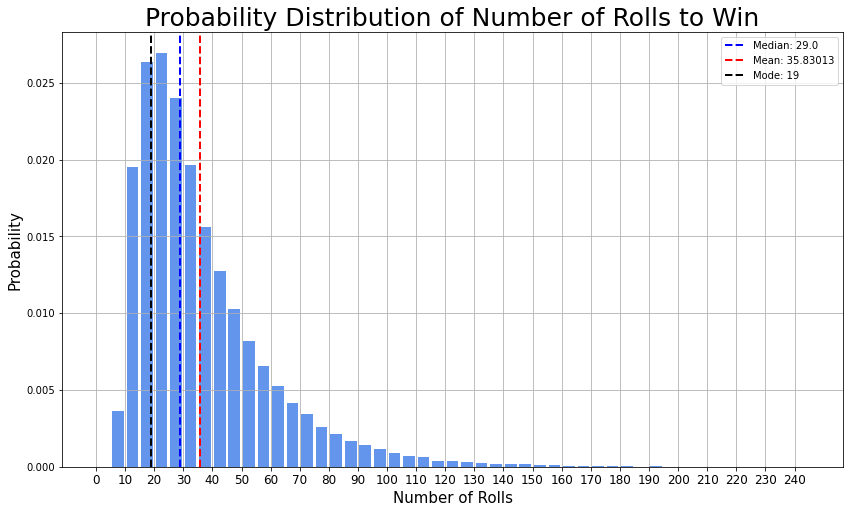

In [8]:
plt.figure(figsize=(14, 8))
plt.hist(results_df['turns'], bins = range(0, 250, 5), density = True, rwidth= 0.8, color = 'cornflowerblue')
plt.xlabel('Number of Rolls', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Probability Distribution of Number of Rolls to Win', fontsize = 25)
plt.xticks(range(0,250,10), fontsize = 12)
plt.axvline(results_df['turns'].median(), color='blue', linestyle = "dashed", linewidth=2, label = f"Median: {results_df['turns'].median()}")
plt.axvline(results_df['turns'].mean(), color='red', linestyle = "dashed", linewidth=2, label = f"Mean: {results_df['turns'].mean()}")
plt.axvline(results_df['turns'].mode()[0], color='black', linestyle = "dashed", linewidth=2, label = f"Mode: {results_df['turns'].mode()[0]}")
plt.legend()
plt.grid()
plt.show()

In [9]:
print(f"Mode of rolls a game takes: {results_df['turns'].mode()[0]}")
print(f"Mean number of rolls a game takes: {results_df['turns'].mean()}")
print(f"Median number of rolls a game takes: {results_df['turns'].median()}")

Mode of rolls a game takes: 19
Mean number of rolls a game takes: 35.83013
Median number of rolls a game takes: 29.0


For this case, since our distribution is skewed far rightwards, it would be wise to use the median as a measure of 'average' meaning that our median rolls per game is around 29

## Examining the maximum and minimum rolls a game will take to win

In [10]:
print(f"Minimum number of spins to win: {min(results_df['turns'])}")
print(f"Maximum number of spins to win: {max(results_df['turns'])}")

Minimum number of spins to win: 7
Maximum number of spins to win: 248


These results are from our simulation, theoretically a game could go on for much longer than max. The minimum however is fixed since there is a most optimal solution to reach the end in the least number of rolls

## Examining the most likely amount of rolls to complete a game and what the probability would be

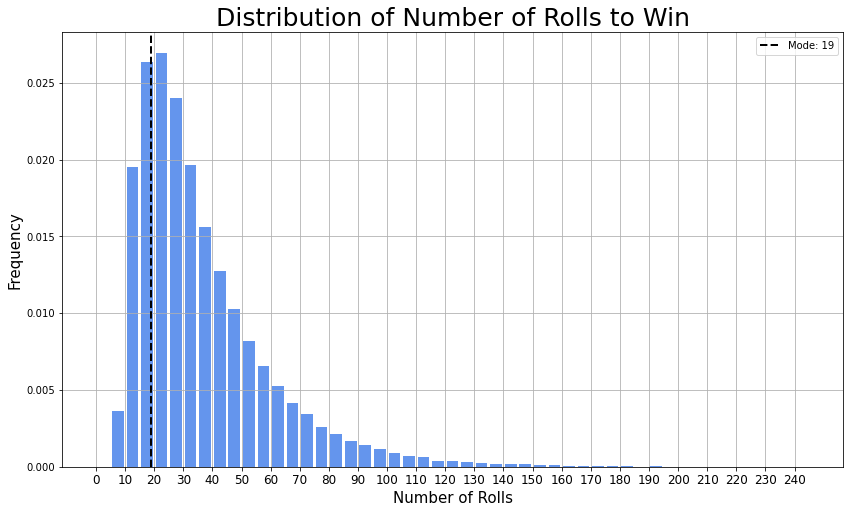

In [11]:
plt.figure(figsize=(14, 8))
plt.hist(results_df['turns'], bins = range(0, 250, 5), density = True, rwidth= 0.8, color = 'cornflowerblue')
plt.xlabel('Number of Rolls', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Number of Rolls to Win', fontsize = 25)
plt.xticks(range(0,250,10), fontsize = 12)
plt.axvline(results_df['turns'].mode()[0], color='black', linestyle = 'dashed', linewidth=2, label = f"Mode: {results_df['turns'].mode()[0]}")
plt.legend()
plt.grid()
plt.show()

In [12]:
# Calculates for the probability of the mode occuring before a game
x = results_df['turns'].mode()[0]
prob = len(results_df[results_df['turns'] == x]) / len(results_df['turns'])
print(f"Most like number of rolls is {x} with a probability of {prob}")

Most like number of rolls is 19 with a probability of 0.02776


## Examining how often players step on snakes and ladders

In [13]:
def reshape_into_board(array):
    """
    Function that reshapes our array of player position on each square into the game board shape
    array: Numpt array of player position on each square
    returns: An transformed array in the shape of the game board
    """
    
    array = array.reshape(10,10)
    array[1::2, :] = array[1::2, ::-1]
    array = np.flipud(array)
    return array

In [14]:
#Transforms the gameboard before going down the snakes and ladders
heatmap_board = reshape_into_board(heatmap_board)

In [15]:
#Transforms the gameboard before going down the snakes and ladders
heatmap_board_after = reshape_into_board(heatmap_board_after)

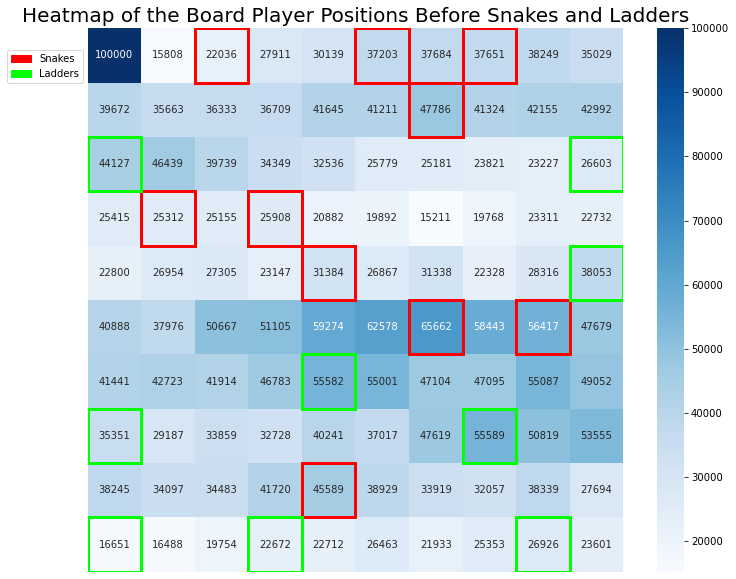

In [16]:
#Create a heatmap of the player position on the gameboard

import matplotlib.patches as patches
#Ladders on 1,4,9,21,28,36,51,71,80 (non-indexing)
#Snakes on 16, 47, 49, 56, 62, 64, 87, 93, 95, 98
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(heatmap_board, cmap = "Blues", annot = True, fmt = 'g')

#Patches add borders to where there are snakes and ladders
ax.add_patch(patches.Rectangle((2, 0), 1, 1, edgecolor='red', fill=False, lw=3))
ax.add_patch(patches.Rectangle((5, 0), 1, 1, edgecolor='red', fill=False, lw=3))
ax.add_patch(patches.Rectangle((7, 0), 1, 1, edgecolor='red', fill=False, lw=3))
ax.add_patch(patches.Rectangle((6, 1), 1, 1, edgecolor='red', fill=False, lw=3))
ax.add_patch(patches.Rectangle((1, 3), 1, 1, edgecolor='red', fill=False, lw=3))
ax.add_patch(patches.Rectangle((3, 3), 1, 1, edgecolor='red', fill=False, lw=3))
ax.add_patch(patches.Rectangle((4, 4), 1, 1, edgecolor='red', fill=False, lw=3))
ax.add_patch(patches.Rectangle((6, 5), 1, 1, edgecolor='red', fill=False, lw=3))
ax.add_patch(patches.Rectangle((8, 5), 1, 1, edgecolor='red', fill=False, lw=3))
ax.add_patch(patches.Rectangle((4, 8), 1, 1, edgecolor='red', fill=False, lw=3))

ax.add_patch(patches.Rectangle((0, 9), 1, 1, edgecolor='lime', fill=False, lw=3))
ax.add_patch(patches.Rectangle((3, 9), 1, 1, edgecolor='lime', fill=False, lw=3))
ax.add_patch(patches.Rectangle((8, 9), 1, 1, edgecolor='lime', fill=False, lw=3))
ax.add_patch(patches.Rectangle((0, 7), 1, 1, edgecolor='lime', fill=False, lw=3))
ax.add_patch(patches.Rectangle((7, 7), 1, 1, edgecolor='lime', fill=False, lw=3))
ax.add_patch(patches.Rectangle((4, 6), 1, 1, edgecolor='lime', fill=False, lw=3))
ax.add_patch(patches.Rectangle((9, 4), 1, 1, edgecolor='lime', fill=False, lw=3))
ax.add_patch(patches.Rectangle((0, 2), 1, 1, edgecolor='lime', fill=False, lw=3))
ax.add_patch(patches.Rectangle((9, 2), 1, 1, edgecolor='lime', fill=False, lw=3))

plt.xticks([])
plt.yticks([])
plt.title('Heatmap of the Board Player Positions Before Snakes and Ladders', fontsize = 20)
red_patch = patches.Patch(color='red', label='Snakes')
blue_patch = patches.Patch(color='lime', label='Ladders')
plt.legend(handles=[red_patch, blue_patch], loc = (-0.15, 0.9))
plt.show()


Not all snakes and ladders are equal. As we can see from the above heatmap of player position on the board after 100,000 games. The Snakes with the highest number of landings is the snake on square 47. The ladder with the highest number of landings is the ladder on square 36

## Additional Information Regarding Board Position, Snakes and Ladders Hit

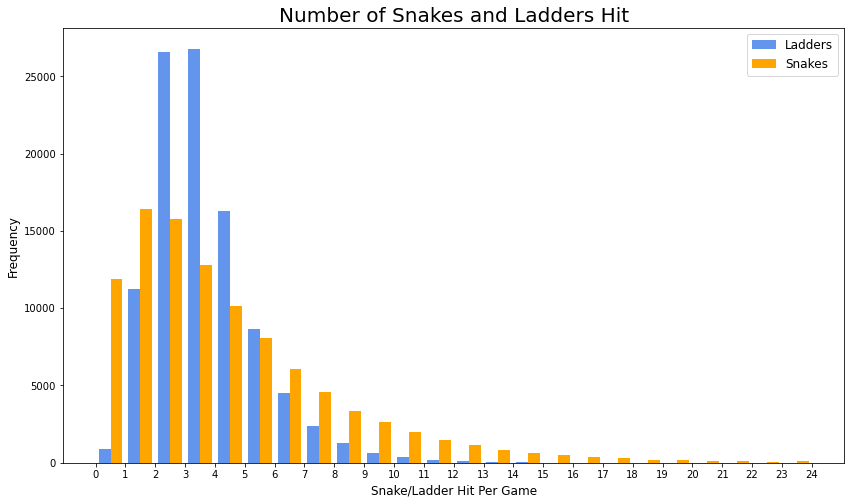

In [17]:
plt.figure(figsize=(14, 8))
x = results_df['ladders_hit']
y = results_df['chutes_hit']
plt.hist([x, y], bins = range(0,25,1), label=['Ladders', 'Snakes'], color = ['cornflowerblue', 'orange'])
plt.title('Number of Snakes and Ladders Hit', fontsize = 20)
plt.xticks(range(0,25,1))
plt.xlabel('Snake/Ladder Hit Per Game', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc='upper right', fontsize = 12)
plt.show()

In [18]:
print(f"Average ladders hit per game: {results_df['ladders_hit'].mean()}")
print(f"Average chutes hit per game: {results_df['chutes_hit'].mean()}")
print(f"Median ladders hit per game: {results_df['ladders_hit'].median()}")
print(f"Median chutes hit per game: {results_df['chutes_hit'].median()}")
print(f"Mode ladders hit per game: {results_df['ladders_hit'].mode()[0]}")
print(f"Mode chutes hit per game: {results_df['chutes_hit'].mode()[0]}")

Average ladders hit per game: 3.21554
Average chutes hit per game: 3.94948
Median ladders hit per game: 3.0
Median chutes hit per game: 3.0
Mode ladders hit per game: 3
Mode chutes hit per game: 1


## Non Monte Carlo approach to the game

In [19]:
def markov_matrix(n):
    
    """
    Creates a markov transition matrix for snakes and ladders
    n: how many times you wnat the transition matrix applied (turns in a game)
    returns: markov transition matrix applied to the starting position n times
    """  
    
    board_snakes_ladders = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44,
                  47:26, 49:11, 51:67, 56:53, 62:19, 64:60,
                  71:91, 80:100, 87:24, 93:73, 95:75, 98:78}
    
    #Create a blank matrix of zeros
    matrix = np.zeros((101,101))
    
    #Add probability of 1/6 for 6 states after i 
    for i in range(101):
        matrix[i + 1: i + 7, i] = 1 / 6
    
    #Ensures the probabilites add to 1 in the columns
    matrix[range(101), range(101)] += 1 - matrix.sum(0)

    #Creating a matrix for the chutes and ladders
    jumping_matrix = np.zeros((101, 101))
    
    ind = [board_snakes_ladders.get(i, i) for i in range(101)]
    jumping_matrix[ind, range(101)] = 1
    
    #Multiplying the two matrices to get the transition matrix
    mkv_matrix =  jumping_matrix @ matrix
    
    #Starting state of a player represented as a vector
    starting_state = [1, *np.zeros(100)]
    
    return np.linalg.matrix_power(mkv_matrix, n) @ starting_state


In [20]:
probability = [markov_matrix(i)[-1] for i in range(200)]

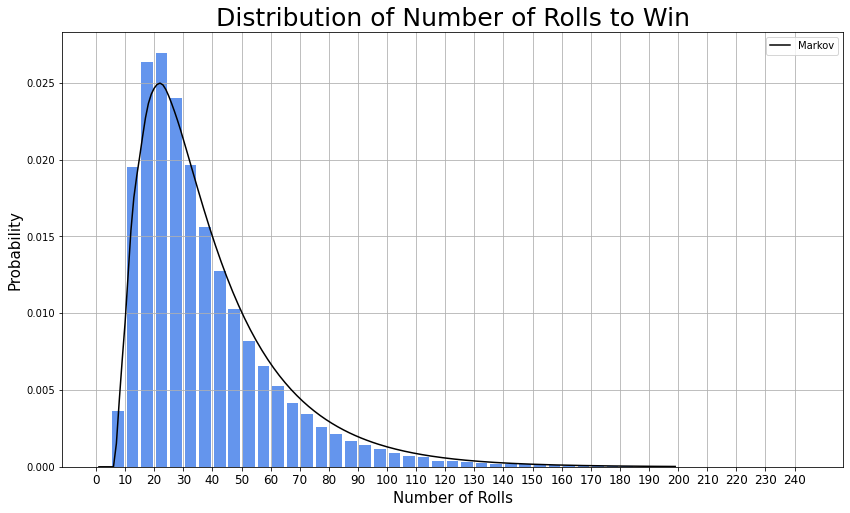

In [22]:
plt.figure(figsize=(14, 8))
plt.hist(results_df['turns'], bins = range(0, 250, 5), density = True, rwidth= 0.8, color = 'cornflowerblue')
plt.plot(np.arange(1, 200), np.diff(probability), color='black', label = 'Markov')
plt.legend()
plt.xlabel('Number of Rolls', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Distribution of Number of Rolls to Win', fontsize = 25)
plt.xticks(range(0,250,10), fontsize = 12)
plt.grid()
plt.show()


In [23]:
mean = np.dot(np.diff(probability),np.arange(1, len(probability)))
median = np.searchsorted(probability, 0.5)
mode = np.argmax(np.diff(probability))
prob_mode = np.diff(probability)[np.argmax(np.diff(probability))]


In [24]:
print(f"Mean of rolls a game takes: {mean}")
print(f"Median of rolls a game takes: {median}")
print(f"Mode of rolls a game takes: {mode}")
print(f"Probability of mode: {prob_mode}")

Mean of rolls a game takes: 39.106460290714445
Median of rolls a game takes: 32
Mode of rolls a game takes: 21
Probability of mode: 0.02497218862634981


# Simulation with 2 Players

In [25]:
## situation with 2 players

def two_player_game():
    
    """
    Simulates a game of snakes and ladders for 2 players
    Returns: player_position1, player_position2 turns
    """
    
    game_board = [37, 0, 0, 10, 0, 0, 0, 0, 22, 0,
                  0, 0, 0, 0, 0, -10, 0, 0, 0, 0,
                  21, 0, 0, 0, 0, 0, 0, 56, 0, 0,
                  0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 
                  0, 0, 0, 0, 0, 0, -21, 0, -38, 0,
                  16, 0, 0, 0, 0, -3, 0, 0, 0, 0,
                  0, -43, 0, -4, 0, 0, 0, 0, 0, 0,
                  20, 0, 0, 0, 0, 0, 0 , 0, 0, 20,
                  0, 0, 0, 0, 0, 0, -63, 0, 0, 0,
                  0, 0, -20, 0 ,-20, 0, 0, -20, 0, 0]

    player_position1 = -1
    player_position2 = -1

    turns = 0 


    while player_position1 < 99 and player_position2 < 99:
        #Moving the player after rolling the dice
        player_position1 += roll_dice()
        
        # Ensure player_position stays within bounds
        player_position1 = min(player_position1, 99)
        player_position1 += game_board[player_position1]
        
        
        player_position2 += roll_dice()
        player_position2 = min(player_position2, 99)
        player_position2 += game_board[player_position2]
        
        turns += 1


    return player_position1, player_position2, turns


In [26]:
# We will do 10,000 simulations
n = 10000

# Create an empty DataFrame to store the results
results_df2 = pd.DataFrame(columns=['turns','player_position1','player_position2'])


for i in range(n):
    
    player_position1, player_position2, turns = two_player_game()
    
    
    new_row2 = pd.Series({'turns': turns, 'player_position1': player_position1, 'player_position2': player_position2})
    results_df2 = pd.concat([results_df2, pd.DataFrame([new_row2])], ignore_index=True)
    

In [27]:
results_df2

,turns,player_position1,player_position2
0,22,96,99
1,17,52,99
2,15,45,99
3,9,99,56
4,20,99,65
...,...,...,...
9995,14,49,99
9996,9,41,99
9997,14,99,60
9998,31,32,99


In [28]:
#results_df2.to_csv("two_player.csv")

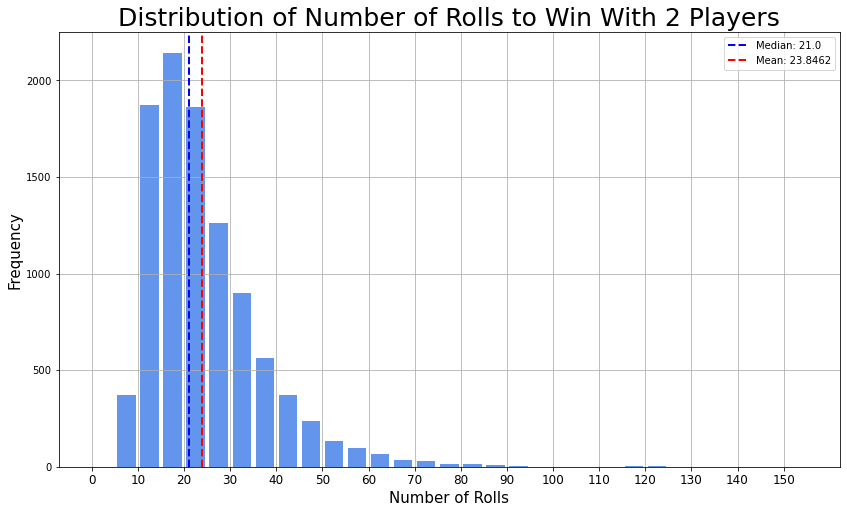

In [29]:
plt.figure(figsize=(14, 8))
plt.hist(results_df2['turns'], bins = range(0, 160, 5), rwidth= 0.8, color = 'cornflowerblue')
plt.xlabel('Number of Rolls', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Number of Rolls to Win With 2 Players', fontsize = 25)
plt.xticks(range(0,160,10), fontsize = 12)
plt.axvline(results_df2['turns'].median(), color='blue', linestyle = "dashed", linewidth=2, label = f"Median: {results_df2['turns'].median()}")
plt.axvline(results_df2['turns'].mean(), color='red', linestyle = "dashed", linewidth=2, label = f"Mean: {results_df2['turns'].mean()}")
plt.legend()
plt.grid()
plt.show()

In [30]:
print(f"Mean of 2 player simulation is: {results_df2['turns'].mean()}")
print(f"Median of 2 player simulation is: {results_df2['turns'].median()}")
print(f"Mode of 2 player simulation is: {results_df2['turns'].mode()[0]}")


Mean of 2 player simulation is: 23.8462
Median of 2 player simulation is: 21.0
Mode of 2 player simulation is: 18


## Situation with 4 players

In [31]:
## situation with 4 players

def four_player_game():
    
    """
    Simulates a game of snakes and ladders for 4 players
    Returns: player_position1, player_position2, player_position3, player_position4, turns
    """
    
    game_board = [37, 0, 0, 10, 0, 0, 0, 0, 22, 0,
                  0, 0, 0, 0, 0, -10, 0, 0, 0, 0,
                  21, 0, 0, 0, 0, 0, 0, 56, 0, 0,
                  0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 
                  0, 0, 0, 0, 0, 0, -21, 0, -38, 0,
                  16, 0, 0, 0, 0, -3, 0, 0, 0, 0,
                  0, -43, 0, -4, 0, 0, 0, 0, 0, 0,
                  20, 0, 0, 0, 0, 0, 0 , 0, 0, 20,
                  0, 0, 0, 0, 0, 0, -63, 0, 0, 0,
                  0, 0, -20, 0 ,-20, 0, 0, -20, 0, 0]

    player_position1 = -1
    player_position2 = -1
    player_position3 = -1
    player_position4 = -1

    turns = 0 


    while player_position1 < 99 and player_position2 < 99 and player_position3 < 99 and player_position4 < 99:
        #Moving the player after rolling the dice
        player_position1 += roll_dice()
        player_position1 = min(player_position1, 99)
        player_position1 += game_board[player_position1]
        
        
        player_position2 += roll_dice()
        player_position2 = min(player_position2, 99)
        player_position2 += game_board[player_position2]
        
        player_position3 += roll_dice()
        player_position3 = min(player_position3, 99)
        player_position3 += game_board[player_position3]
        
        player_position4 += roll_dice()
        player_position4 = min(player_position4, 99)
        player_position4 += game_board[player_position4]
        
        turns += 1
    
    return turns

In [32]:
# We will do 10,000 simulations
n = 10000

# Create an empty DataFrame to store the results
results_df3 = pd.DataFrame(columns=['turns'])


for i in range(n):
    
    turns = four_player_game()
    
    
    new_row3 = pd.Series({'turns': turns})
    results_df3 = pd.concat([results_df3, pd.DataFrame([new_row3])], ignore_index=True)

In [33]:
results_df3

,turns
0,22
1,15
2,17
3,15
4,14
...,...
9995,11
9996,13
9997,27
9998,9


In [34]:
#results_df3.to_csv("four_player.csv")

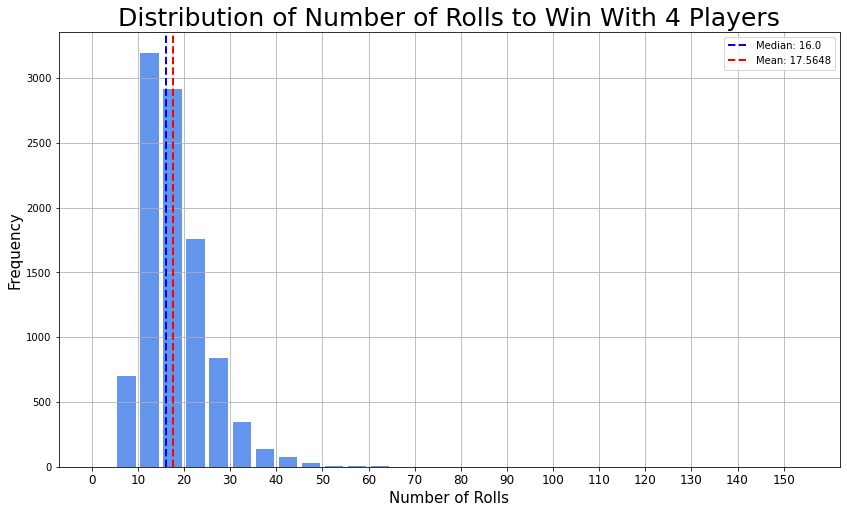

In [35]:
plt.figure(figsize=(14, 8))
plt.hist(results_df3['turns'], bins = range(0, 160, 5), rwidth= 0.8, color = 'cornflowerblue')
plt.xlabel('Number of Rolls', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of Number of Rolls to Win With 4 Players', fontsize = 25)
plt.xticks(range(0,160,10), fontsize = 12)
plt.axvline(results_df3['turns'].median(), color='blue', linestyle = "dashed", linewidth=2, label = f"Median: {results_df3['turns'].median()}")
plt.axvline(results_df3['turns'].mean(), color='red', linestyle = "dashed", linewidth=2, label = f"Mean: {results_df3['turns'].mean()}")
plt.legend()
plt.grid()
plt.show()

In [36]:
print(f"Mean of 4 player simulation is: {results_df3['turns'].mean()}")
print(f"Median of 4 player simulation is: {results_df3['turns'].median()}")
print(f"Mode of 4 player simulation is: {results_df3['turns'].mode()[0]}")

Mean of 4 player simulation is: 17.5648
Median of 4 player simulation is: 16.0
Mode of 4 player simulation is: 12


## Extra Visuals:

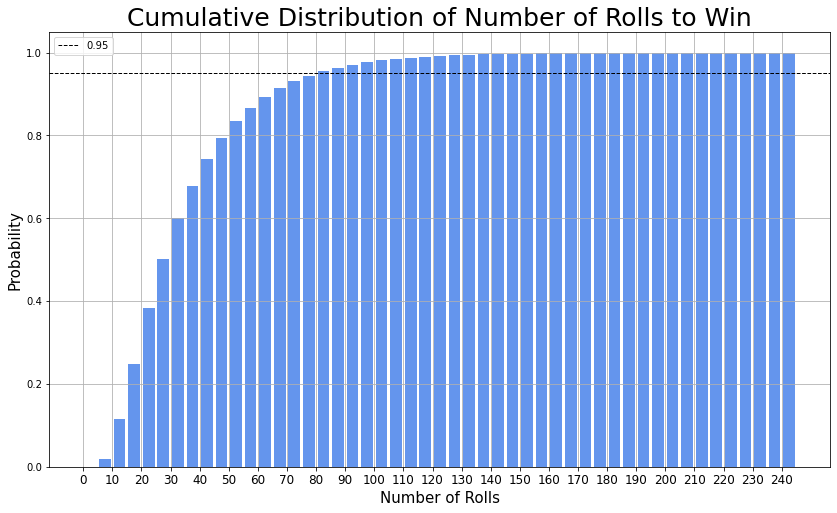

In [37]:
plt.figure(figsize=(14, 8))
plt.hist(results_df['turns'], bins = range(0, 250, 5), density = True, cumulative = True, rwidth= 0.8, color = 'cornflowerblue')
plt.xlabel('Number of Rolls', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Cumulative Distribution of Number of Rolls to Win', fontsize = 25)
plt.xticks(range(0,250,10), fontsize = 12)
plt.axhline(0.95, color='black', linestyle = "dashed", linewidth=1, label = f"0.95")
plt.legend()
plt.grid()
plt.show()

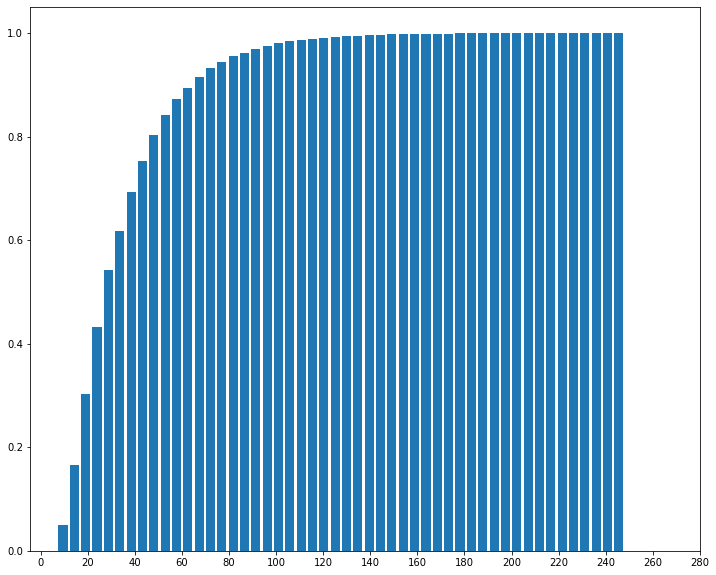

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(results_df['turns'], bins = 50, cumulative = True, density = True, rwidth = 0.8)
plt.xticks(range(0,300, 20))
plt.show()

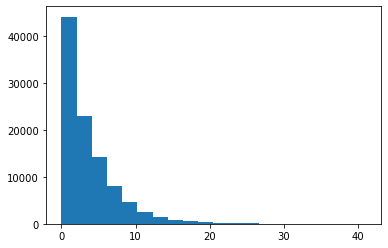

In [ ]:
plt.hist(results_df['chutes_hit'], bins = 20)
plt.show()

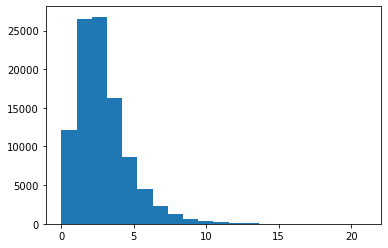

In [ ]:
plt.hist(results_df['ladders_hit'], bins = 20)
plt.show()

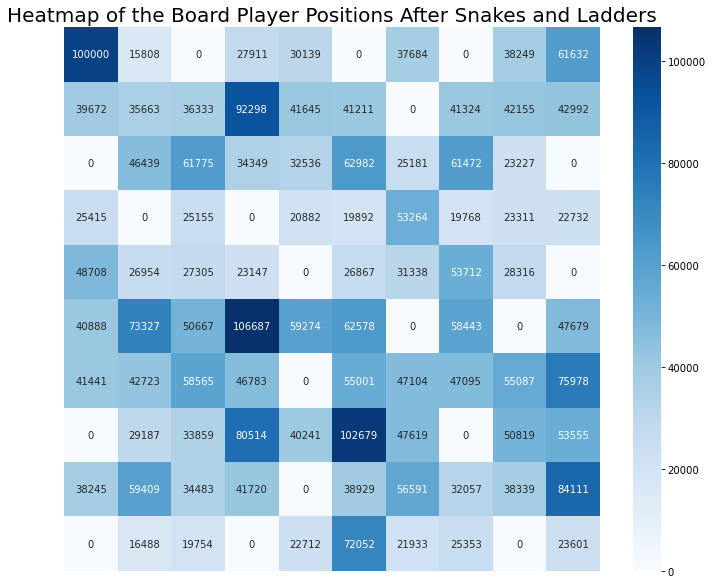

In [ ]:
#Create a heatmap of the player position on the gameboard
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_board_after, cmap = "Blues", annot = True, fmt = 'g')
plt.xticks([])
plt.yticks([])
plt.title('Heatmap of the Board Player Positions After Snakes and Ladders', fontsize = 20)
plt.show()